In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import glob
import warnings
warnings.filterwarnings('ignore')
import time

In [10]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [11]:
path = '/Users/user/Desktop/Project/Data/Dirty Data'
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
df_combined = pd.concat(df_list,ignore_index=True)

In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          7730 non-null   object 
 1   Salary Estimate    6980 non-null   object 
 2   Job Description    7730 non-null   object 
 3   Rating             900 non-null    float64
 4   Company Name       7730 non-null   object 
 5   Location           7729 non-null   object 
 6   Headquarters       901 non-null    float64
 7   Size               6860 non-null   object 
 8   Founded            5205 non-null   object 
 9   Type of ownership  6852 non-null   object 
 10  Industry           5982 non-null   object 
 11  Sector             5955 non-null   object 
 12  Revenue            5935 non-null   object 
 13  Competitors        900 non-null    float64
dtypes: float64(3), object(11)
memory usage: 845.6+ KB


In [13]:
df_combined.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/combined data.csv', index=False)
df_combined.to_csv(r'/Users/user/Desktop/Project/Scripts/combined data.csv', index=False)

In [14]:
df_combined['Location'].value_counts()

Houston, TX        424
Remote             359
Dallas, TX         121
Austin, TX         103
Midland, TX         89
                  ... 
Garyville, LA        1
Osceola, AR          1
Attleboro, MA        1
Federal Way, WA      1
Marshall, MI         1
Name: Location, Length: 1331, dtype: int64

In [15]:
df_combined['Location'].nunique()

1331

In [16]:
df_combined['Sector'].value_counts()

Manufacturing                                  2346
Energy, Mining & Utilities                     1010
Information Technology                          518
Pharmaceutical & Biotechnology                  472
Construction, Repair & Maintenance Services     375
-1                                              268
Aerospace & Defense                             235
Human Resources & Staffing                      144
Management & Consulting                         134
Government & Public Administration               87
Agriculture                                      57
Education                                        56
Retail & Wholesale                               52
Healthcare                                       36
Transportation & Logistics                       36
Financial Services                               32
Media & Communication                            28
Insurance                                        17
Unknown / Non-Applicable                         13
$50 to $100 

In [158]:
df_combined[df_combined['Sector']=='$50 to $100 million (USD)']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
2940,DRUG CHEMIST II.3014300,Employer Provided Salary:$61K,Requisition Title: DRUG CHEMIST II.3014300 - 2...,NaN,Dallas County\n3.1,"Dallas, TX",NaN,201 to 500 Employees,Government,Municipal Agencies,Government & Public Administration,$50 to $100 million (USD),NaN,NaN


In [159]:
df_combined.iloc[0]

Job Title                                       Materials Engineer III
Salary Estimate                          $71K - $140K (Glassdoor est.)
Job Description      In this role you will\nCharacterize materials ...
Rating                                                            -1.0
Company Name                                           eTeam Inc.\n4.3
Location                                                   Seattle, WA
Headquarters                                                      -1.0
Size                                           5001 to 10000 Employees
Founded                                                         1999.0
Type of ownership                                    Company - Private
Industry                                     Staffing & Subcontracting
Sector                                      Human Resources & Staffing
Revenue                                     $100 to $500 million (USD)
Competitors                                                       -1.0
Name: 

In [17]:
df_combined['Revenue'][df_combined['Sector']=='$1 to $5 million (USD)'] = '$1 to $5 million (USD)'
df_combined['Sector'][df_combined['Sector']=='$1 to $5 million (USD)'] = np.nan
df_combined['Sector'][df_combined['Sector']=='$100 to $500 million (USD)'] = np.nan
df_combined['Sector'][df_combined['Sector']=='$50 to $100 million (USD)'] = np.nan
df_combined['Sector'][df_combined['Sector']=='$25 to $50 million (USD)'] = np.nan

In [12]:
df_combined[df_combined['Sector']=='$1 to $5 million (USD)']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [18]:
df_combined['Size'].value_counts()

10000+ Employees           2681
1001 to 5000 Employees     1055
201 to 500 Employees        713
51 to 200 Employees         644
1 to 50 Employees           481
Unknown                     418
5001 to 10000 Employees     381
501 to 1000 Employees       345
-1                          142
Name: Size, dtype: int64

In [19]:
df_combined['Job Title'].nunique()

1922

In [20]:
df_combined.duplicated().sum()

3497

In [21]:
df_combined[df_combined.duplicated()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
50,Chemical Engineer,$63K - $103K (Glassdoor est.),Requisition Number: HTB-20161010-001\nPosition...,-1.0,Hi-Tech Bangla\n2.2,"Dallas, TX",-1.0,1 to 50 Employees,2008.0,Company - Public,NaN,-1,Less than $1 million (USD),-1.0
58,Process Engineer,Employer Provided Salary:$115K - $135K,Process Engineer\nWhat’s in it for you?\nThere...,-1.0,Ethos,"Augusta, GA",-1.0,-1,-1.0,-1,-1,-1,-1,-1.0
91,Chemical Process Engineer,Employer Provided Salary:$100K - $120K,"Chemical Process Engineer (full-time, permanen...",NaN,Ethos,"Olympia, WA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Process Engineer,Employer Provided Salary:$75K - $100K,We are looking for a Process Engineer who is l...,NaN,Saint-Gobain\n4.0,"Bow, NH",NaN,10000+ Employees,1665.0,Company - Public,Machinery Manufacturing,Manufacturing,$10+ billion (USD),NaN
119,Process Engineer,$51K - $93K (Glassdoor est.),Seneca Foods is one of North America's leading...,NaN,Seneca Foods\n3.7,"Hart, MI",NaN,1001 to 5000 Employees,1949.0,Company - Public,Food & Beverage Manufacturing,Manufacturing,$1 to $2 billion (USD),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725,Ceramic Process Engineer,Employer Provided Salary:$100K,Summary/Objective\nThe Ceramic Process Enginee...,NaN,Zircoa Inc.,"Solon, OH",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7726,Pharmaceutical Process Engineer I,$66K - $114K (Glassdoor est.),Position Summary\nThe Pharmaceutical Process E...,NaN,Catalent\n3.5,"San Diego, CA",NaN,10000+ Employees,2007.0,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$2 to $5 billion (USD),NaN
7727,Process Engineer,NaN,Do you have passion improving processes and so...,NaN,Feed Energy,"Des Moines, IA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728,Process Engineer - Building Materials,Employer Provided Salary:$80K - $100K,BASIC JOB FUNCTIONS / RESPONSIBILITIES:\nDay t...,NaN,ZAAS,"Sanford, NC",NaN,Unknown,NaN,Company - Public,NaN,NaN,NaN,NaN


In [22]:
df_combined.duplicated(subset=df_combined.columns).value_counts()

False    4233
True     3497
dtype: int64

In [23]:
df_dropped_duplicates = df_combined.drop_duplicates(inplace=False)

In [24]:
df_dropped_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4233 entries, 0 to 7716
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          4233 non-null   object 
 1   Salary Estimate    3842 non-null   object 
 2   Job Description    4233 non-null   object 
 3   Rating             560 non-null    float64
 4   Company Name       4233 non-null   object 
 5   Location           4232 non-null   object 
 6   Headquarters       561 non-null    float64
 7   Size               3901 non-null   object 
 8   Founded            3099 non-null   object 
 9   Type of ownership  3898 non-null   object 
 10  Industry           3509 non-null   object 
 11  Sector             3488 non-null   object 
 12  Revenue            3462 non-null   object 
 13  Competitors        560 non-null    float64
dtypes: float64(3), object(11)
memory usage: 496.1+ KB


In [25]:
df_dropped_duplicates['Sector'].value_counts()

Manufacturing                                  1357
Energy, Mining & Utilities                      548
Information Technology                          311
Pharmaceutical & Biotechnology                  300
Construction, Repair & Maintenance Services     197
Aerospace & Defense                             168
-1                                              146
Management & Consulting                          91
Human Resources & Staffing                       71
Government & Public Administration               63
Agriculture                                      43
Education                                        39
Retail & Wholesale                               35
Healthcare                                       27
Transportation & Logistics                       18
Financial Services                               15
Media & Communication                            14
Insurance                                        13
Unknown / Non-Applicable                         11
$10 to $25 m

In [26]:
df_dropped_duplicates.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/NoDuplicates.csv',index=False)

In [27]:
df_dropped_duplicates['Job Title'].value_counts()

Process Engineer                                                           634
Chemical Engineer                                                          111
Chemical Process Engineer                                                   71
Senior Process Engineer                                                     53
Manufacturing Engineer                                                      50
                                                                          ... 
Manufacturing, Process, and Packaging Engineer - Belvidere, IL               1
Process Engineer/Manufacturing Engineer                                      1
Manufacturing Process Engineer - New Model Introduction and Maintenance      1
Therapeutic Products Program- Process Engineer I-II                          1
Process Technology Development Engineer                                      1
Name: Job Title, Length: 1922, dtype: int64

In [29]:
df_dropped_duplicates.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Materials Engineer III,$71K - $140K (Glassdoor est.),In this role you will\nCharacterize materials ...,-1.0,eTeam Inc.\n4.3,"Seattle, WA",-1.0,5001 to 10000 Employees,1999.0,Company - Private,Staffing & Subcontracting,Human Resources & Staffing,$100 to $500 million (USD),-1.0
1,Chemical Process Engineer,Employer Provided Salary:$100K - $120K,"Process Engineer (FT, permanent hire position ...",-1.0,Ethos,"Dallas, TX",-1.0,-1,-1.0,-1,-1,-1,-1,-1.0
2,Chemical Engineer,Employer Provided Salary:$63K - $125K,The Opportunity\nThe Chemical Engineer will be...,-1.0,Clean Harbors\n3.3,"Kimball, NE",-1.0,10000+ Employees,1980.0,Company - Public,Shipping & Trucking,Transportation & Logistics,$2 to $5 billion (USD),-1.0


In [30]:
df_dropped_unwanted_columns = df_dropped_duplicates.drop(['Rating','Competitors','Headquarters'],axis=1)

In [31]:
df_dropped_unwanted_columns.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/NoUnWantedCols.csv',index=False)

In [32]:
df_dropped_unwanted_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4233 entries, 0 to 7716
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          4233 non-null   object
 1   Salary Estimate    3842 non-null   object
 2   Job Description    4233 non-null   object
 3   Company Name       4233 non-null   object
 4   Location           4232 non-null   object
 5   Size               3901 non-null   object
 6   Founded            3099 non-null   object
 7   Type of ownership  3898 non-null   object
 8   Industry           3509 non-null   object
 9   Sector             3488 non-null   object
 10  Revenue            3462 non-null   object
dtypes: object(11)
memory usage: 396.8+ KB


In [33]:
df_dropped_unwanted_columns['Type of ownership'].value_counts()

Company - Public                          2093
Company - Private                         1294
Subsidiary or Business Segment             191
Government                                  80
-1                                          65
College / University                        36
Unknown / Non-Applicable                    24
Nonprofit Organization                      23
Unknown                                     22
Private Practice / Firm                     17
Contract                                    12
Self-employed                               10
Consumer Product Manufacturing               5
Transportation Equipment Manufacturing       5
Hospital                                     3
Energy & Utilities                           2
Wood & Paper Manufacturing                   2
Machinery Manufacturing                      2
Less than $1 million (USD)                   2
$5 to $10 million (USD)                      2
Architectural & Engineering Services         1
Legal        

In [34]:
df_dropped_unwanted_columns['Revenue'].value_counts()

$10+ billion (USD)                  1096
Unknown / Non-Applicable             350
$5 to $10 billion (USD)              347
$2 to $5 billion (USD)               319
$100 to $500 million (USD)           315
$1 to $2 billion (USD)               200
-1                                   143
$500 million to $1 billion (USD)     133
$50 to $100 million (USD)            127
$25 to $50 million (USD)             116
$10 to $25 million (USD)             113
$1 to $5 million (USD)                70
$5 to $10 million (USD)               70
Less than $1 million (USD)            63
Name: Revenue, dtype: int64

In [35]:
df_dropped_unwanted_columns.describe()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
count,4233,3842,4233,4233,4232,3901,3099.0,3898,3509,3488,3462
unique,1922,1729,3658,2050,1331,9,322.0,28,80,30,14
top,Process Engineer,-1,"ABOUT US\n\nEstablished in 1992, MINTH has bec...",Intel\n4.3,"Houston, TX",10000+ Employees,1968.0,Company - Public,Energy & Utilities,Manufacturing,$10+ billion (USD)
freq,634,67,5,69,224,1634,65.0,2093,521,1357,1096


In [36]:
df_dropped_unwanted_columns['Company Name'].value_counts().head(10)

Intel\n4.3                               69
Apple\n4.2                               57
Northrop Grumman\n4.0                    54
Occidental Petroleum Corporation\n3.7    38
Tesla\n3.7                               37
Marathon Petroleum Company LP\n3.5       25
Worley\n3.5                              23
TDK Headway Technologies, Inc.\n4.5      23
Applied Materials\n4.0                   22
Arkema\n3.9                              22
Name: Company Name, dtype: int64

In [37]:
df_dropped_unwanted_columns['Salary Estimate'].replace(to_replace='-1',value=np.nan,inplace=True)
df_dropped_unwanted_columns.describe()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
count,4233,3775,4233,4233,4232,3901,3099.0,3898,3509,3488,3462
unique,1922,1728,3658,2050,1331,9,322.0,28,80,30,14
top,Process Engineer,Employer Provided Salary:$30 Per Hour,"ABOUT US\n\nEstablished in 1992, MINTH has bec...",Intel\n4.3,"Houston, TX",10000+ Employees,1968.0,Company - Public,Energy & Utilities,Manufacturing,$10+ billion (USD)
freq,634,36,5,69,224,1634,65.0,2093,521,1357,1096


In [38]:
df_dropped_unwanted_columns['Founded'].replace(to_replace='-1',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Industry'].replace(to_replace='-1',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Sector'].replace(to_replace='-1',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Revenue'].replace(to_replace='-1',value=np.nan,inplace=True)

In [39]:
df_dropped_unwanted_columns['Founded'].replace(to_replace=-1.0,value=np.nan,inplace=True)
df_dropped_unwanted_columns.describe()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
count,4233,3775,4233,4233,4232,3901,3034.0,3898,3366,3342,3319
unique,1922,1728,3658,2050,1331,9,320.0,28,79,29,13
top,Process Engineer,Employer Provided Salary:$30 Per Hour,"ABOUT US\n\nEstablished in 1992, MINTH has bec...",Intel\n4.3,"Houston, TX",10000+ Employees,1968.0,Company - Public,Energy & Utilities,Manufacturing,$10+ billion (USD)
freq,634,36,5,69,224,1634,65.0,2093,521,1357,1096


In [40]:
df_dropped_unwanted_columns['Founded'].unique()

array([1999.0, nan, 1980.0, 1861.0, 1967.0, 1899.0, 1979.0, 1851.0,
       2000.0, 2003.0, 1976.0, 2008.0, 1941.0, 2020.0, 1944.0, 2002.0,
       1863.0, 1908.0, 2004.0, 1957.0, 1968.0, 1892.0, 2007.0, 1989.0,
       2014.0, 1879.0, 1949.0, 1963.0, 1998.0, 1865.0, 1665.0, 1977.0,
       1910.0, 1978.0, 1983.0, 2013.0, 1909.0, 1923.0, 1926.0, 1948.0,
       1906.0, 1947.0, 1996.0, 1929.0, 1852.0, 1902.0, 2006.0, 1928.0,
       1920.0, 2016.0, 1898.0, 1847.0, 2018.0, 1914.0, 1885.0, 1845.0,
       1997.0, 1853.0, 1994.0, 1946.0, 1905.0, 1854.0, 1891.0, 1973.0,
       1894.0, 1849.0, 1884.0, 1930.0, 1919.0, 1903.0, 1888.0, 2021.0,
       1942.0, 1848.0, 2009.0, 1988.0, 2012.0, 2015.0, 1883.0, 1924.0,
       1887.0, 1995.0, 1987.0, 1990.0, 1959.0, 1938.0, 1982.0, 1970.0,
       1841.0, 1969.0, 1961.0, 1952.0, 1890.0, 2010.0, 1933.0, 1966.0,
       1912.0, 1925.0, 1993.0, 1775.0, 1971.0, 1870.0, '1980', '1926',
       '2003', '1851', '1979', '1996', '1885', '1901',
       'Company - Private

In [41]:
df_dropped_unwanted_columns[df_dropped_unwanted_columns['Founded']=='Company - Public']['Type of Ownership']= 'Company - Public'
df_dropped_unwanted_columns[df_dropped_unwanted_columns['Founded']=='Government']['Type of Ownership']= 'Governement'
df_dropped_unwanted_columns['Founded'][df_dropped_unwanted_columns['Founded']=='Sel-employed']['Type of Ownership'] = 'Self-employed'
df_dropped_unwanted_columns['Founded'][df_dropped_unwanted_columns['Founded']=='Company - Private']['Type of Ownership'] = 'Company - Private'

In [42]:
df_dropped_unwanted_columns['Founded'].replace(to_replace='Company - Public',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Founded'].replace(to_replace='Subsidiary or Business Segment',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Founded'].replace(to_replace='Contract',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Founded'].replace(to_replace='Government',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Founded'].replace(to_replace='Self-employed',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Founded'].replace(to_replace='Company - Private',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Industry'].replace(to_replace='Unknown / Non-Applicable',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Sector'].replace(to_replace='Unknown / Non-Applicable',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Revenue'].replace(to_replace='Unknown / Non-Applicable',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Type of ownership'].replace(to_replace='Unknown',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Type of ownership'].replace(to_replace='-1',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Size'].replace(to_replace='-1',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Size'].replace(to_replace='Unknown',value=np.nan,inplace=True)

In [44]:
df_dropped_unwanted_columns['Founded'][df_dropped_unwanted_columns['Founded']=='Government'] = np.nan
df_dropped_unwanted_columns['Founded'] = df_dropped_unwanted_columns['Founded'].apply(float)
df_dropped_unwanted_columns['Founded'].dtype

dtype('float64')

<AxesSubplot:>

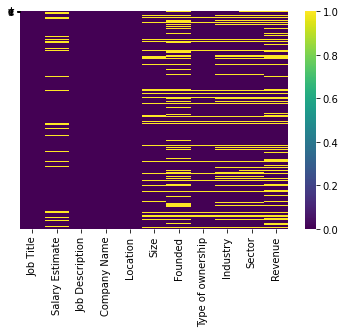

In [45]:
sns.heatmap(df_dropped_unwanted_columns.isnull(),annot=False,cmap='viridis',yticklabels='vertical')

In [46]:
df_dropped_unwanted_columns['Salary Estimate'].replace(to_replace=np.nan,value='nil',inplace=True)

In [47]:
def cleaned_salary(col):
    if 'Per Hour' in col:
        salary = re.findall(pattern='\d{3}|\d{2}',string=col)
        if len([float(i) for i in salary]) == 0:
            return np.nan
        else:
            return (sum([float(i) for i in salary])/len([float(i) for i in salary]))*40*52
    else:
        salary = re.findall(pattern='\d{3}|\d{2}',string=col)
        if len([float(i) for i in salary]) == 0:
            return np.nan
        else:
            return (sum([float(i) for i in salary])*10**3)/len([float(i) for i in salary])


In [45]:
cleaned_salary('Employer Provided Salary:$75 - $85 Per Hour')

166400.0

In [48]:
df_dropped_unwanted_columns['Average Salary'] = df_dropped_unwanted_columns['Salary Estimate'].apply(cleaned_salary)

In [49]:
df_dropped_unwanted_columns['Average Salary'].describe()

count      3775.000000
mean      86693.886093
std       24024.054425
min       10000.000000
25%       73000.000000
50%       84500.000000
75%       98000.000000
max      250000.000000
Name: Average Salary, dtype: float64

In [50]:
df_dropped_unwanted_columns[df_dropped_unwanted_columns['Average Salary']==250000]['Job Description'].iloc[0]

"You may not realize it, but you’ve likely used a product today made possible by the plastics and chemicals manufactured by Chevron Phillips Chemical. From medical supplies and electronics to food packaging and cosmetics, we create the building blocks for more than 70,000 consumer and industrial products.\n\nEven as a global company with 5,000 employees, we maintain a “small company feel” and uphold a culture of respect, diversity, and inclusion. Ask any Chevron Phillips Chemical employee what they like best about their job, and universally, the answer is “the people I work with!” We value work-life balance, and love to see our employees thrive both professionally and personally. There has never been a better time to work for Chevron Phillips Chemical. If you’re ready to grow with us and become part of our vision of being the premier Chemical Company, apply today!\n\nPurpose/Introduction\nWe are seeking a Lead Project Engineer to join our team at the Pasadena Complex located in Pasaden

In [51]:
bySalary = pd.pivot_table(data=df_dropped_unwanted_columns,index='Job Title',values='Average Salary')
bySalary.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
Job Title,
Project Engineer Team Lead,250000.0
Sales Manager - Oil & Gas,240000.0
Senior Staff MOCVD Process Engineer,200000.0
Director of Engineering,200000.0
Director of Business Development MSW Leachate,187500.0
Petrochemicals Industry Expert,182500.0
Process Scientist,182000.0
Drilling Engineering Manager,180000.0
Inkjet Process Integration Engineer,180000.0


In [52]:
byLoc = pd.pivot_table(data=df_dropped_unwanted_columns,index='Location',values='Average Salary')
byLoc.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
Location,
"Benson, NC",202800.0
"Goleta, CA",200000.0
"Seabrook, TX",171600.0
"Arvada, CO",161000.0
"Fishers, IN",160000.0
"Hampton, VA",152000.0
"Nekoosa, WI",150000.0
"Sykesville, MD",150000.0
"Los Alamitos, CA",148720.0


In [53]:
byInd = pd.pivot_table(data=df_dropped_unwanted_columns,index='Sector',values='Average Salary')
byInd.sort_values(by='Average Salary', ascending = False)

,Average Salary
Sector,
Insurance,113666.666667
Telecommunications,105333.333333
$5 to $10 million (USD),100000.000000
Information Technology,98426.133333
Business Consulting,95000.000000
Management & Consulting,93532.048193
Human Resources & Staffing,92679.436620
"Energy, Mining & Utilities",92259.728155
Aerospace & Defense,91443.358779


In [88]:
df_dropped_unwanted_columns['Sector'].replace(to_replace='5 to 10 million (USD)',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Sector'].replace(to_replace='10 to 25 million (USD)',value=np.nan,inplace=True)
df_dropped_unwanted_columns['Sector'].replace(to_replace='Less than $1 million (USD)',value=np.nan,inplace=True)

In [89]:
byInd = pd.pivot_table(data=df_dropped_unwanted_columns,index='Sector',values='Average Salary')
byInd.sort_values(by='Average Salary', ascending = False)

,Average Salary
Sector,
Insurance,113666.666667
Telecommunications,105333.333333
$5 to $10 million (USD),100000.000000
Information Technology,98426.133333
Business Consulting,95000.000000
Management & Consulting,93532.048193
Human Resources & Staffing,92679.436620
"Energy, Mining & Utilities",92259.728155
Aerospace & Defense,91443.358779


In [66]:
df_dropped_unwanted_columns.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/CleanedSalary.csv',index=False)

In [67]:
byEmp = pd.pivot_table(data=df_dropped_unwanted_columns,index='Company Name',values='Average Salary')
byEmp.sort_values(by='Average Salary', ascending = False)

,Average Salary
Company Name,
FPG\n4.0,240000.0
SM&A\n3.9,230880.0
Mackin Talent\n4.2,205920.0
Affordable Personnel Services,202800.0
WCL Group\n5.0,200000.0
...,...
Wickham Industries\n3.7,29120.0
State of Tennessee\n3.4,26000.0
PriceRite\n3.5,26000.0


In [68]:
df_dropped_unwanted_columns.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average Salary
0,Materials Engineer III,$71K - $140K (Glassdoor est.),In this role you will\nCharacterize materials ...,eTeam Inc.\n4.3,"Seattle, WA",5001 to 10000 Employees,1999.0,Company - Private,Staffing & Subcontracting,Human Resources & Staffing,$100 to $500 million (USD),105500.0
1,Chemical Process Engineer,Employer Provided Salary:$100K - $120K,"Process Engineer (FT, permanent hire position ...",Ethos,"Dallas, TX",NaN,NaN,NaN,NaN,NaN,NaN,110000.0
2,Chemical Engineer,Employer Provided Salary:$63K - $125K,The Opportunity\nThe Chemical Engineer will be...,Clean Harbors\n3.3,"Kimball, NE",10000+ Employees,1980.0,Company - Public,Shipping & Trucking,Transportation & Logistics,$2 to $5 billion (USD),94000.0
3,Chemical Engineer,Employer Provided Salary:$60K - $125K,"Become the hands-on, subject matter expert on ...",Metronom Health\n3.5,"Laguna Hills, CA",51 to 200 Employees,NaN,Company - Private,NaN,NaN,NaN,92500.0
4,Software Engineer,$83K - $141K (Glassdoor est.),Information on MIT’s COVID-19 vaccination requ...,MIT\n4.4,"Cambridge, MA",10000+ Employees,1861.0,College / University,Colleges & Universities,Education,$2 to $5 billion (USD),112000.0


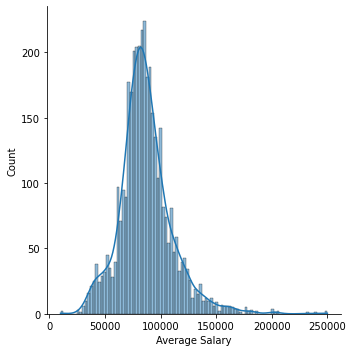

In [69]:
sns.displot(df_dropped_unwanted_columns['Average Salary'],kde=True,bins=100)

<AxesSubplot:ylabel='Average Salary'>

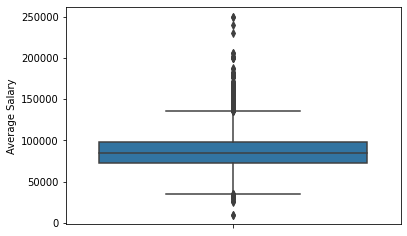

In [70]:
sns.boxplot(y=df_dropped_unwanted_columns['Average Salary'])

In [71]:
df_dropped_unwanted_columns.head(10)

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average Salary
0,Materials Engineer III,$71K - $140K (Glassdoor est.),In this role you will\nCharacterize materials ...,eTeam Inc.\n4.3,"Seattle, WA",5001 to 10000 Employees,1999.0,Company - Private,Staffing & Subcontracting,Human Resources & Staffing,$100 to $500 million (USD),105500.0
1,Chemical Process Engineer,Employer Provided Salary:$100K - $120K,"Process Engineer (FT, permanent hire position ...",Ethos,"Dallas, TX",NaN,NaN,NaN,NaN,NaN,NaN,110000.0
2,Chemical Engineer,Employer Provided Salary:$63K - $125K,The Opportunity\nThe Chemical Engineer will be...,Clean Harbors\n3.3,"Kimball, NE",10000+ Employees,1980.0,Company - Public,Shipping & Trucking,Transportation & Logistics,$2 to $5 billion (USD),94000.0
3,Chemical Engineer,Employer Provided Salary:$60K - $125K,"Become the hands-on, subject matter expert on ...",Metronom Health\n3.5,"Laguna Hills, CA",51 to 200 Employees,NaN,Company - Private,NaN,NaN,NaN,92500.0
4,Software Engineer,$83K - $141K (Glassdoor est.),Information on MIT’s COVID-19 vaccination requ...,MIT\n4.4,"Cambridge, MA",10000+ Employees,1861.0,College / University,Colleges & Universities,Education,$2 to $5 billion (USD),112000.0
5,ASSISTANT ENGINEER,Employer Provided Salary:$73K - $98K,The City of Santa Ana is looking for individua...,City of Santa Ana\n4.0,"Santa Ana, CA",1001 to 5000 Employees,NaN,Government,Government & Public Administration,NaN,NaN,85500.0
6,Water Science Field Consultant (Chemist or Che...,Employer Provided Salary:$60K - $120K,Ideal candidate:\nWould prefer to work in the ...,Industrial Treatment of Water LLC,"Sacramento, CA",NaN,NaN,NaN,NaN,NaN,NaN,90000.0
7,Project Engineer,Employer Provided Salary:$77K - $105K,Shaw Industries Corporate Engineering (CE) pro...,"Shaw Industries Group, Inc.\n3.9","Aiken, SC",10000+ Employees,1967.0,Company - Private,Machinery Manufacturing,Manufacturing,$2 to $5 billion (USD),91000.0
8,Chemical Process Engineer,Employer Provided Salary:$67K - $102K,"Tarr LLC, a leading independent chemical distr...",Tarr LLC\n2.7,"Phoenix, AZ",51 to 200 Employees,NaN,Company - Public,NaN,NaN,$50 to $100 million (USD),84500.0
9,LABORATORY ENGINEER,$60K - $113K (Glassdoor est.),Description\nHosokawa provides size reduction ...,Hosokawa Micron Powder Systems\n3.4,"Summit, NJ",51 to 200 Employees,NaN,Company - Public,Manufacturing,Consumer Product Manufacturing,$25 to $50 million (USD),86500.0


In [78]:
def remove_newline(col):
    string = col.replace('\n',' ')
    return string

In [79]:
remove_newline('Ideal candidate:\nWould prefer to work in the ...')

'Ideal candidate: Would prefer to work in the ...'

In [80]:
df_dropped_unwanted_columns['Job Description'] = df_dropped_unwanted_columns['Job Description'].apply(remove_newline)
df_dropped_unwanted_columns['Job Description'].iloc[1]

"Process Engineer (FT, permanent hire position with excellent benefits, bonus and relocation assistance packages) Description: This person will be doing process optimization, day to day support, data analytics, and small capital project work. This person will be hitting the plot floor with the opportunity to wear lots of different hats and pick up a lot of different skill sets and experiences while improving parts of the process like the data collection system. Requirements: B.S. Chemical Engineering 3+ years out of the following manufacturing industries Chemicals Pharmaceuticals Coatings Water treatment Job Type: Full-time Pay: $100,000.00 - $120,000.00 per year Benefits: 401(k) 401(k) matching Dental insurance Employee assistance program Health insurance Health savings account Life insurance Paid time off Parental leave Professional development assistance Referral program Relocation assistance Retirement plan Vision insurance Schedule: Monday to Friday Supplemental Pay: Bonus pay Edu

In [81]:
df_dropped_unwanted_columns['Company Name'] = df_dropped_unwanted_columns['Company Name'].apply(remove_newline)

In [82]:
def remove_rating(col):
    string = re.findall(pattern = '[^\d{1}.\d]',string=col)
    string = ''.join(string)
    return string

In [83]:
remove_rating('Trane Technologies 4.0')

'Trane Technologies '

In [84]:
df_dropped_unwanted_columns['Company Name'] = df_dropped_unwanted_columns['Company Name'].apply(remove_rating)

In [85]:
df_dropped_unwanted_columns['Company Name']

0                    eTeam Inc 
1                         Ethos
2                Clean Harbors 
3              Metronom Health 
4                          MIT 
                 ...           
7632      onsemi Semiconductor 
7647    Tokyo Electron Limited 
7664                  Catalent 
7697          The AZEK Company 
7716                     Tesla 
Name: Company Name, Length: 4233, dtype: object

In [86]:
df_dropped_unwanted_columns['Size'].unique()

array(['5001 to 10000 Employees', nan, '10000+ Employees',
       '51 to 200 Employees', '1001 to 5000 Employees',
       '1 to 50 Employees', '501 to 1000 Employees',
       '201 to 500 Employees'], dtype=object)

In [87]:
df_dropped_unwanted_columns['Revenue'].unique()

array(['$100 to $500 million (USD)', nan, '$2 to $5 billion (USD)',
       '$50 to $100 million (USD)', '$25 to $50 million (USD)',
       '$10+ billion (USD)', '$1 to $2 billion (USD)',
       '$1 to $5 million (USD)', 'Less than $1 million (USD)',
       '$500 million to $1 billion (USD)', '$5 to $10 billion (USD)',
       '$10 to $25 million (USD)', '$5 to $10 million (USD)'],
      dtype=object)

In [90]:
df_dropped_unwanted_columns['Location'].unique()

array(['Seattle, WA', 'Dallas, TX', 'Kimball, NE', ..., 'Farr West, UT',
       'Van Nuys, CA', 'Marshall, MI'], dtype=object)

In [91]:
def states(col):
    try:
        if ',' in col:
            string = col[col.index(','):]
            string = string.replace(',','')
            string = string.replace(' ','')
            return string
        else:
            return col
    except TypeError:
        return np.nan

In [92]:
states('Pennsville')

'Pennsville'

In [93]:
df_dropped_unwanted_columns['States'] = df_dropped_unwanted_columns['Location'].apply(states)

In [94]:
df_dropped_unwanted_columns['States'].unique()

array(['WA', 'TX', 'NE', 'CA', 'MA', 'SC', 'AZ', 'NJ', 'MN', 'Remote',
       'OH', 'NY', 'PA', 'NV', 'DC', 'NC', 'MT', 'GA', 'VA', 'MO', 'MI',
       'IN', 'NM', 'CO', 'OK', 'WI', 'OR', 'WY', 'FL', 'NH', 'TN', 'IL',
       'AR', nan, 'RI', 'ID', 'DE', 'CT', 'LA', 'MD', 'Texarkana', 'KY',
       'Georgia', 'WV', 'HI', 'ND', 'MS', 'United States', 'AK', 'Ohio',
       'UT', 'KS', 'Pennsylvania', 'New Jersey', 'PR', 'Arizona', 'AL',
       'Illinois', 'Texas', 'IA', 'ME', 'Florida', 'CuyahogaOH',
       'Massachusetts', 'California', 'Indiana', 'Colorado',
       'South Dakota', 'Minnesota', 'SD', 'VT', 'Virginia',
       'St Louis Park', 'Deptford Township', 'Delaware', 'FultonGA',
       'Wisconsin', 'Tennessee'], dtype=object)

In [97]:
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='California'] = 'CA'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Pennsylvania'] = 'PA'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='CuyahogaOH'] = 'OH'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='New Jersey'] = 'NJ'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Indiana'] = 'IND'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Florida'] = 'FL'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Texas'] = 'TX'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Georgia'] = 'GA'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Delaware'] = 'DE'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='FultonGA'] = 'GA'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Deptford Township'] = 'NJ'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Wisconsin'] = 'WI'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Tennessee'] = 'TN'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='United States'] = np.nan
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Texarkana'] = 'TX'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Illinois'] = 'IL'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Arizona'] = 'AZ'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Ohio'] = 'OH'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Massachusetts'] = 'MA'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Colorado'] = 'CO'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Minnesota'] = 'MN'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='South Dakota'] = 'SD'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='Virginia'] = 'VA'
df_dropped_unwanted_columns['States'][df_dropped_unwanted_columns['States']=='St Louis Park'] = 'MN'

In [98]:
df_dropped_unwanted_columns['States'].value_counts()

TX        716
CA        541
IL        150
NC        144
OH        140
Remote    140
PA        134
NY        119
MA        114
MI        110
CO        109
NJ        107
GA        106
LA        100
FL         95
OR         93
MN         88
AZ         85
SC         84
WI         80
WA         75
TN         73
IN         61
VA         59
MD         51
MO         51
UT         49
IA         40
CT         40
AL         39
OK         38
NM         37
KY         35
NV         34
NH         29
AR         29
RI         26
WV         21
ND         18
NE         18
KS         17
ID         17
MS         17
DC         14
DE         13
PR         12
WY         11
MT          9
ME          8
AK          6
HI          4
IND         4
SD          4
VT          3
Name: States, dtype: int64

In [99]:
df_dropped_unwanted_columns.head(2)

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average Salary,States
0,Materials Engineer III,$71K - $140K (Glassdoor est.),In this role you will Characterize materials (...,eTeam Inc,"Seattle, WA",5001 to 10000 Employees,1999.0,Company - Private,Staffing & Subcontracting,Human Resources & Staffing,$100 to $500 million (USD),105500.0,WA
1,Chemical Process Engineer,Employer Provided Salary:$100K - $120K,"Process Engineer (FT, permanent hire position ...",Ethos,"Dallas, TX",NaN,NaN,NaN,NaN,NaN,NaN,110000.0,TX


In [100]:
byState = pd.pivot_table(data=df_dropped_unwanted_columns,index='States',values='Average Salary')
byState.sort_values(by='Average Salary', ascending = False)

,Average Salary
States,
Remote,108286.923077
CT,106227.027027
CA,99904.026846
CO,96011.730769
DC,94321.428571
OR,92996.444444
TX,92443.486239
WA,92253.611111
HI,92125.000000


In [101]:
df_dropped_unwanted_columns['Average Salary'].describe()

count      3775.000000
mean      86693.886093
std       24024.054425
min       10000.000000
25%       73000.000000
50%       84500.000000
75%       98000.000000
max      250000.000000
Name: Average Salary, dtype: float64

In [102]:
first_quartile = df_dropped_unwanted_columns['Average Salary'].quantile(0.25)
third_quartile = df_dropped_unwanted_columns['Average Salary'].quantile(0.75)
inter_quartile_range = third_quartile - first_quartile
filter1 = ((df_dropped_unwanted_columns['Average Salary'] < first_quartile -1.5 * inter_quartile_range) | (df_dropped_unwanted_columns['Average Salary'] > third_quartile + 1.5*inter_quartile_range))
filter2 = ((df_dropped_unwanted_columns['Average Salary'] >= first_quartile -1.5 * inter_quartile_range) & (df_dropped_unwanted_columns['Average Salary'] <= third_quartile + 1.5*inter_quartile_range))
outliers = df_dropped_unwanted_columns.loc[filter1]
removed_outliers = df_dropped_unwanted_columns.loc[filter2]

In [103]:
outliers['Average Salary'].describe()

count       163.000000
mean     135108.098160
std       53055.427511
min       10000.000000
25%      137500.000000
50%      145500.000000
75%      162250.000000
max      250000.000000
Name: Average Salary, dtype: float64

In [104]:
removed_outliers['Average Salary'].describe()

count      3612.000000
mean      84509.080842
std       19140.131035
min       35500.000000
25%       72800.000000
50%       83500.000000
75%       95500.000000
max      135500.000000
Name: Average Salary, dtype: float64

In [106]:
removed_outliers.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/RemovedOutliers.csv',index=False)
outliers.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/Outliers.csv',index=False)
df_dropped_unwanted_columns.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/FixedStates.csv',index=False)

<AxesSubplot:>

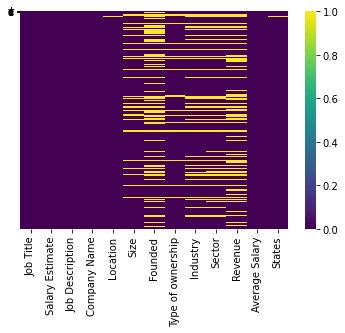

In [107]:
sns.heatmap(removed_outliers.isnull(),annot=False,cmap='viridis',yticklabels='vertical')

In [108]:
removed_outliers['Company Age'] = removed_outliers['Founded'].apply(lambda x : 2022-x if x != np.nan else x)
removed_outliers['Company Age'].head(10)

0     23.0
1      NaN
2     42.0
3      NaN
4    161.0
5      NaN
6      NaN
7     55.0
8      NaN
9      NaN
Name: Company Age, dtype: float64

In [109]:
removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3612 entries, 0 to 7716
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3612 non-null   object 
 1   Salary Estimate    3612 non-null   object 
 2   Job Description    3612 non-null   object 
 3   Company Name       3612 non-null   object 
 4   Location           3611 non-null   object 
 5   Size               3149 non-null   object 
 6   Founded            2557 non-null   float64
 7   Type of ownership  3308 non-null   object 
 8   Industry           2900 non-null   object 
 9   Sector             2871 non-null   object 
 10  Revenue            2568 non-null   object 
 11  Average Salary     3612 non-null   float64
 12  States             3607 non-null   object 
 13  Company Age        2557 non-null   float64
dtypes: float64(3), object(11)
memory usage: 423.3+ KB


<AxesSubplot:>

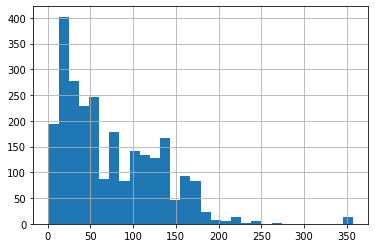

In [110]:
removed_outliers['Company Age'].hist(bins=30)

In [111]:
removed_outliers['Company Age'].describe()

count    2557.000000
mean       73.643723
std        56.329063
min         1.000000
25%        26.000000
50%        55.000000
75%       115.000000
max       357.000000
Name: Company Age, dtype: float64

In [112]:
removed_outliers[removed_outliers['Company Age']>350]['Company Name']

73         Saint-Gobain 
1116    EMD ELECTRONICS 
1127    EMD ELECTRONICS 
1426     MilliporeSigma 
2508       Saint-Gobain 
2650    EMD ELECTRONICS 
2666       Saint-Gobain 
2755       Saint-Gobain 
2759       Saint-Gobain 
2908       Saint-Gobain 
4720       Saint-Gobain 
4926       Saint-Gobain 
6989       Saint-Gobain 
7130       Saint-Gobain 
Name: Company Name, dtype: object

In [113]:
def degree_finder(col,degree):
    degrees = {'Bachelors':["bsc","b.sc","bachelor","bachelors","bachelor's","bachelors'","b.sc.","bsc.","b sc.","bachelor's.","bachelors'.","b.s","b.s.","bs/ms","bs/ms/phd","bs.c",'btech','b.tech'],
           'Masters':["msc","m.sc","masters","master's","masters'","m.sc.","msc.","m sc.","masters.","master's.","masters'.","m.s","m.s.","bs/ms","bs/ms/phd",'mtech','m.tech'],
           'PHD':["phd","ph.d","doctorate","p.hd","phd.","ph.d.","doctorate.","p.hd.","bs/ms/phd"]
    }
    count = False
    while count == False:
        for item in degrees[degree]: 
            if item in col.lower():
                return 'yes'
            elif ('BS' in col)and (degree == 'Bachelors'):
                return 'yes'
        count = True
    return 'No'  

In [89]:
degree_finder('Imagine New Horizons...  BIOVIA, a wholly owned subsidiary of DASSAULT SYSTEMES provides a sophisticated enterprise system of modeling, simulation, laboratory, quality, and process data management solutions. Our customers use these systems to discover, design, and deliver innovative sustainable and competitive products to consumers globally.  We support industries and organizations that rely on innovation to differentiate themselves. Our customer base includes the world’s largest pharmaceutical, biotechnology, chemical, energy, and consumer goods companies.  We provide software and cloud services for scientists and engineers, which helps them do their job better. With access to data, tools and applications to understand that data and analytical and predictive capabilities our customers produce quality products.  What will your role be? We are looking for an experienced Java Engineer to join our Discoverant development team. This role will play a leading part in the development of new generation web-based applications in the area of Scientific Analytics for Process Production Operations in Life Sciences You will work within a team of software developers alongside Product Managers and Quality Engineers to develop and enhance BIOVIA software products. BIOVIA employs a scaled agile approach with an increasing emphasis on DevOps to support the development and continuous testing of our service-oriented architectures.  The Challenges Ahead You will be defining and describing the architecture, functional behavior, limitations and acceptance tests of new and enhanced capabilities. You will need to design and specify how capabilities will be implemented: select algorithms as well as theories or technologies that will be used, plan appropriate user interface, and identify and manage dependencies on other components. You know what good software engineering looks like and how to build flexible, extensible and re-usable architectures. You are intrigued by the challenges of security, scalability, and availability, and understand the techniques and technologies deployed to support these goals. You know how to measure performance characteristics against the scaling of users and data volumes, and how to address bottlenecks. You understand the importance of building a testing strategy into any product development, to provide ongoing quality assurance into the future. You want to help other developers learn from your experience and insights. You are confident about solving any product defect through a rational and efficient approach. You notice and act upon opportunities for continuous improvement in development and release processes; you seek empowerment to make things better for everyone. You recognize the importance of working with project management to establish a clear definition of development goals and product specifications and align them with a long-term roadmap. Your Key Success Factors? Bachelors or Masters Degree in Chemical Engineering, Computer Science, Statistics or related fields Strong experience with Java is critical Experience with development of software for use in regulated industries is a strong plus Understanding of Software Architecture Experience with service oriented architectures Experience with Web App Development with HTML5, Angular, TypeScript Database experience with Oracle, SQL Server, NoSQL databases Compensation for the this role will be commensurate with experience. The total expected compensation range will be between $130,000 and $140,000, representing the base salary (or annualized salary based on estimated hourly compensation) and target bonus Compensation & Benefits Dassault Systèmes offers an excellent salary with potential for bonus, commensurate with experience. Benefits include a choice of plans providing comprehensive coverage for medical, dental, vision care for employee & dependents as well as employee life, short & long term disability, tuition reimbursement, immediate 401K enrollment, 401K match (50 cents on the dollar, up to the first 8% of your eligible compensation that you contribute based on match eligibility criteria), flexible time off policy, and 9 paid holidays. Equal opportunity In order to provide equal employment and advancement opportunities to all individuals, employment decisions at 3DS are based on merit, qualifications and abilities. 3DS is committed to a policy of non-discrimination and equal opportunity for all employees and qualified applicants without regard to race, color, religion, gender, sex (including pregnancy, childbirth or medical or common conditions related to pregnancy or childbirth), sexual orientation, gender identity, gender expression, marital status, familial status, national origin, ancestry, age (40 and above), disability, veteran status, military service, application for military service, genetic information, receipt of free medical care, or any other characteristic protected under applicable law. 3DS will make reasonable accommodations for qualified individuals with known disabilities, in accordance with applicable law. Apply Now: click Apply Now Show Less','PHD')

'No'

In [114]:
removed_outliers['Bachelors'] = removed_outliers['Job Description'].apply(degree_finder,args=['Bachelors'])
removed_outliers['Bachelors'].head(10)

0    yes
1    yes
2    yes
3    yes
4    yes
5    yes
6     No
7    yes
8    yes
9     No
Name: Bachelors, dtype: object

In [115]:
removed_outliers['Bachelors'].value_counts() 

yes    2847
No      765
Name: Bachelors, dtype: int64

In [116]:
removed_outliers['Masters'] = removed_outliers['Job Description'].apply(degree_finder,args=['Masters'])
removed_outliers['Masters'].head(10)

0    No
1    No
2    No
3    No
4    No
5    No
6    No
7    No
8    No
9    No
Name: Masters, dtype: object

In [117]:
removed_outliers['Masters'].value_counts()

No     3268
yes     344
Name: Masters, dtype: int64

In [118]:
removed_outliers['PHD'] = removed_outliers['Job Description'].apply(degree_finder,args=['PHD'])
removed_outliers['PHD']

0        No
1        No
2        No
3        No
4        No
       ... 
7632     No
7647     No
7664     No
7697     No
7716    yes
Name: PHD, Length: 3612, dtype: object

In [119]:
removed_outliers['PHD'].value_counts()

No     3296
yes     316
Name: PHD, dtype: int64

In [120]:
removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3612 entries, 0 to 7716
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3612 non-null   object 
 1   Salary Estimate    3612 non-null   object 
 2   Job Description    3612 non-null   object 
 3   Company Name       3612 non-null   object 
 4   Location           3611 non-null   object 
 5   Size               3149 non-null   object 
 6   Founded            2557 non-null   float64
 7   Type of ownership  3308 non-null   object 
 8   Industry           2900 non-null   object 
 9   Sector             2871 non-null   object 
 10  Revenue            2568 non-null   object 
 11  Average Salary     3612 non-null   float64
 12  States             3607 non-null   object 
 13  Company Age        2557 non-null   float64
 14  Bachelors          3612 non-null   object 
 15  Masters            3612 non-null   object 
 16  PHD                3612 

In [121]:
removed_outliers.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/WithDegrees.csv',index=False)

In [174]:
def years_of_experience(col):
    string1 = re.findall('[\W](\d)[\W]year',col)
    string2 = re.findall('[\W](\d)\+[\W]year',col)
    string3 = re.findall('[\W](\d{2})[\W]year',col)
    string4 = re.findall('[\W](\d{2})\+[\W]year',col)
    string5 = re.findall('\((\d{1})\)',col)
    string6 = re.findall('\((\d{2})\)',col)
    string1.extend(string2)
    string1.extend(string3)
    string1.extend(string4)
    string1.extend(string5)
    string1.extend(string6)
    if len(string1) == 0:
        return np.nan
    try:
        years = [int(x) for x in string1 if int(x) <= 25 and int(x) != 18]
        # 18 years was excluded due to the fact that in a lot of job descriptions it was used to signify...
        # ....age of eligibility and not years of experience.
        
        # 25 years was chosen as the the maximum because  most of the time ages above that threshold stood for...
        # ....things other than years of experience e.g company age.
        return max(years)
    except ValueError:
        return np.nan

In [129]:
string = re.search('(\((\d{2})\))[\W]year','Basic Function Provide technical advice and guidance as the subject matter expert for production engineering, for conventional and unconventional oil and gas resources. Apply engineering expertise to review complex production operations issues and recommend remediation practices or procedures. Perform and direct major engineering projects and technical services requiring original or unusual analysis and solution. May coordinate or collaborate with other engineers. Preferred experience includes well completion design, sand control, scale mitigation, artificial lift, gas production optimization, and water management. Duties & Responsibilities Initiate, develop, and coordinate study / analysis to recommend solutions for improving operating efficiency, increasing recovery, or reducing cost. Present recommendations in a formal report to management and operations partner. Serve as consultant to participate in project technical reviews and assess proposals for new or changed operating procedures to ensure efficient and economic operations. Based on experience in North America, identify operational best practices relevant to Saudi Aramco. Conduct technology scouting, collaborate with operations partners in the Kingdom of Saudi Arabia for field test or implementation pilot, analyze subsequent results as needed. Represent ASC and Saudi Aramco in dealings with technology vendors, service providers, outside consultants, etc. within his/her area of expertise. Keep current on latest innovation and participate in technical societies of his/her area of expertise; represent ASC and Saudi Aramco on industry committees or specialized groups as appropriate. Perform other duties and participate in special projects as assigned. Education and Experience B.S. in Petroleum, Mechanical, or Chemical Engineering; M.S or PhD is desirable, but not required Typically has at least ten (10) years of relevant experience, including at least five (5) years in production operations Preferred experience includes well completion design, sand control, scale mitigation, artificial lift, gas production optimization, and water management. Operational / field experience in high H2S environment, hydraulic fracturing and acidizing is desirable. Familiar with oil and gas software applications (e.g. Resfrac, GOHFER, Petrel, SandCade, FracCADE, PIPESIM) Must be able to prepare technical reports and briefs; present to management and operations partners Must possess good work ethic, and be able to adhere to company work hours, policies, and standard business etiquette Must be able to communicate and comprehend accurately, clearly and concisely in English  NO THIRD PARTY CANDIDATES ACCEPTED DM7Za5mZO1 Show Less')
string.group(2)

'10'

In [130]:
years_of_experience("Flint Hills Resources Pine Bend Refinery in Rosemount, MN located in the Minneapolis/St. Paul metro, is hiring a Plant Engineer. The plant engineering role is a position that builds refinery operations knowledge and understanding and application of key engineering fundamentals. These skills will enable further career opportunities in asset management, reliability or project/construction management. Flint Hills Resources is a different kind of company, we are privately owned, eligible for a flexible work arrangement and a â€œ9/80â€ work schedule that offers every other Friday off and our compensation philosophy is based on the value you create. Come realize your full potential and join our team! What You Will Do In Your Role As a plant engineer, you will develop and demonstrate an understanding of: FHR/Pine Bendâ€™s safety culture Oil flow and high-level function of refinery process units Basic refinery economics Analytical skills and engineering knowledge to identify, assess, and implement EH&S and business improvement opportunities Reliability Engineering and small projects related to equipment reliability/improvement Engineering fundamentals applied to unit monitoring and troubleshooting Production Team problem resolution or opportunity definition developed within prescribed timelines Function and purpose of the different support groups within the refinery Support Turnaround activities in assigned areas as required Troubleshooting of mechanical-related problems and leverage of root cause analysis techniques to determine the appropriate repair scopes Capital project management, construction management, â€œKeep It Runningâ€ maintenance, and refinery Turnaround execution Adhering to safe work practices while planning and coordinating execution of priority work throughout the refinery Drive innovation and transformation, make calculated bets, improve efficiency, expand capability, and create value through the application of MBM principles The Experience You Will Bring Requirements: Bachelorâ€™s degree in Engineering (i.e., Mechanical, Electrical, Petroleum, Chemical, Civil/Structural) Minimum of two (2) years of experience in reliability engineering or related role What Will Put You Ahead Three (3) years or more experience in a refining/petro-chemical/manufacturing facility Construction or project execution experience Job Type: Full-time Benefits: 401(k) 401(k) matching Dental insurance Employee assistance program Employee discount Flexible schedule Flexible spending account Health insurance Health savings account Life insurance Paid time off Parental leave Professional development assistance Referral program Relocation assistance Retirement plan Tuition reimbursement Vision insurance Schedule: 8 hour shift Monday to Friday Supplemental Pay: Bonus pay Work Location: One location Show Less")

3

In [131]:
removed_outliers['Years of Experience']=removed_outliers['Job Description'].apply(years_of_experience)
removed_outliers['Years of Experience']

0       NaN
1       3.0
2       4.0
3       1.0
4       NaN
       ... 
7632    5.0
7647    8.0
7664    0.0
7697    3.0
7716    4.0
Name: Years of Experience, Length: 3612, dtype: float64

In [132]:
removed_outliers['Years of Experience'].isna().value_counts()

False    2486
True     1126
Name: Years of Experience, dtype: int64

In [133]:
removed_outliers['Years of Experience'].value_counts()

5.0     680
3.0     455
2.0     372
10.0    201
1.0     179
4.0     163
8.0     112
7.0     104
6.0      79
12.0     33
15.0     29
20.0     28
9.0      13
0.0       9
11.0      7
25.0      6
16.0      4
14.0      3
21.0      3
17.0      2
13.0      2
19.0      1
24.0      1
Name: Years of Experience, dtype: int64

In [134]:
removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3612 entries, 0 to 7716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            3612 non-null   object 
 1   Salary Estimate      3612 non-null   object 
 2   Job Description      3612 non-null   object 
 3   Company Name         3612 non-null   object 
 4   Location             3611 non-null   object 
 5   Size                 3149 non-null   object 
 6   Founded              2557 non-null   float64
 7   Type of ownership    3308 non-null   object 
 8   Industry             2900 non-null   object 
 9   Sector               2871 non-null   object 
 10  Revenue              2568 non-null   object 
 11  Average Salary       3612 non-null   float64
 12  States               3607 non-null   object 
 13  Company Age          2557 non-null   float64
 14  Bachelors            3612 non-null   object 
 15  Masters              3612 non-null   o

In [135]:
removed_outliers.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/WithExperience.csv',index=False)

In [136]:
def tech_skill_finder(col):
    skills = ['python','programming','html','css','javascript','java','web development','machine learning','artificial intelligence','deep learning'
             ,'software development','deep learning','data analysis','data analytics','software engineering','c++','r programming','big data','programming language'
             ,'data science','data engineering','matlab','sas programming','sas','c#','php','sql','computer science']
    count = False
    while count == False:
        for item in skills: 
            if item in col.lower():
                return 'yes'
        count = True
    return 'No'

In [137]:
def microsoft_skill(col):
    skills = ['microsoft','ms word','ms excel','ms outlook','ms powerpoint','ms access','powerpoint','outlook','word','access','excel','micorsoft-word',
             'microsoft-excel','microsoft-powerpoint','microsoft-outlook','microsoft-access']
    count = False
    while count == False:
        for item in skills: 
            if item in col.lower():
                return 'yes'
        count =  True
    return 'No'

In [138]:
def full_time(col):
    fulltime = ['fulltime','full-time']
    count = False
    while count == False:
        for item in fulltime: 
            if item in col.lower():
                return 'yes'
        count = True
    return 'No'

In [139]:
def specialty(col):
    special = ['chemical engineer','chemical engineering','chemical-engineering','chemical-engineer']
    count = False
    while count == False:
        for item in special: 
            if item in col.lower():
                return 'yes'
        count = True
    return 'No'

In [140]:
tech_skill_finder("Posting End Date: May 30, 2022 Employee Type: Regular-Full time Union/Non: This is a non-union position Are you an experienced pipeline engineer who is excited to provide technical expertise, support and guidance to improve the safe and reliable design, construction and operation of natural gas pipelines? If so, this opportunity is for you! Hereâ€™s what you will do: Ensure that all pipelines and associated facilities (main line valves, scraper trap barrels) are designed in accordance with all regulations, applicable industry codes and corporate specifications and standards. Define the scope, schedule and budget for the design and materials for pipeline projects. Manage the execution of the design deliverables by a third-party engineering firm against the project budget and schedule. Review and approve design deliverables for example drawings, technical reports and material listing sheets. Review vendor materials quotations, prepares technical evaluations, and recommends to the supervisor selections based on technical merit along with price and delivery. Review and approve fabrication and assembly approval drawings for pressure vessels, engineered equipment, and other fabrications (prefabricated buildings, piping fabrications, scraper trap barrels, etc.). Provide engineering support during construction activities when required. Support the commissioning of newly installed pipeline/metering and regulation facilities when required. Review lessons learned from past projects and incorporate recommendations into future designs. Provide technical guidance to junior engineers within the team. Support department initiatives as required. Who you are: You have: B.S in Mechanical/Civil Engineering and/or another engineering discipline with Pipeline experience. Minimum of 4 years of experience in consulting or operating companies. Capability of working independently, managing multiple projects and prioritizing tasks accordingly. Analytical problem-solving capability through use of standards, modification of standards and/or previous experience. Effective communication in technical issues and impacts to other technical and non-technical staff. The following are considered assets: Natural gas pipeline design experience for onshore transmission lines in the U.S. Experience with FERC filing process (Pre-File, 7(c), prior notice, and/or blanket certificates & permits). Working knowledge of industry codes (ASME B31.8, 49CFR192 (DOT Code), ASME BPVC Sect. VIII). Familiarity and knowledge of materials standards & specs (ANSI Ratings, ASME, API, MSS, etc.). Horizontal Directional Drill Design (HDD), road bores, and applicable load/stress calculations. Professional designations relevant to project management or industry (CAPM, PMP, MBA, CWI, NACE, etc.). Professional Engineer (P.E.) designation in the US in Civil, Mechanical or Chemical Engineering (or desire to obtain). Working Conditions: Approximately 75-90% of office-based work with multiple project teams. Approximately 10-25% of in-field work scoping projects or supporting construction and commissioning activities. Time sensitive deliverables. Work requires strong computer skills typically using Microsoft Office applications (Word, Excel, PowerPoint, Outlook, Teams). Enbridge provides competitive workplace programs that differentiate us and offer flexibility to our team members. Enbridgeâ€™s FlexWork (Hybrid Work Model) offers eligible employees the opportunity to work variable daily schedules with a flexible start and end time, to opt for a compressed workweek schedule, and the option to work from home on Wednesdays and Fridays. Role requirements determine your eligibility for each option or combination of options. #LI-Hybrid Physical Requirements include but are not limited to: Grasping, kneeling, light â€“ moderate lifting (objects up to 20 pounds), reaching above shoulder, repetitive motion, typing, sitting, standing, visual requirement (able to see screens, detect color coding, read fine print), hearing requirement and the ability to sit at a computer for long periods of time. Mental Requirements (Both Field & Office) include but are not limited to: Ability to: understand, remember and apply oral and/or written instructions or other information, understand complex problems and collaborate/explore alternative solutions, organize thoughts and ideas into understandable terminology, organize and prioritize work schedule on a short-term basis, make decisions which have moderate impact on the immediate work unit and monitor impact outside this area, understand and follow basic instructions and guidelines, complete routine forms, compose letters, outlines, memoranda and basic reports and communicate with individuals via telephone. Diversity and inclusion are important to us. Enbridge is an Equal Opportunity and Affirmative Action Employer . We are committed to providing employment opportunities to all qualified individuals, without regard to age, race, color, national or ethnic origin, religion, sex, sexual orientation, gender identity or expression, marital status, family status, veteran status, Indigenous/Native American status, or disability. Applicants with disabilities can request accessible formats, communication supports, or other accessibility assistance by contacting careers@enbridge.com . Information For Applicants: Applications can be submitted via our online recruiting system only. We appreciate your interest in working with us; however, only those applicants selected for interviews will be contacted. Final candidates for this position may be required to undergo a security screening, including a criminal records check. To apply to this job, click Apply Now Show Less")

'No'

In [141]:
removed_outliers['Coding Skill'] = removed_outliers['Job Description'].apply(tech_skill_finder)
removed_outliers['Coding Skill'].value_counts()

No     2763
yes     849
Name: Coding Skill, dtype: int64

In [142]:
removed_outliers['Microsoft Skill'] = removed_outliers['Job Description'].apply(microsoft_skill)
removed_outliers['Microsoft Skill'].value_counts()

yes    2263
No     1349
Name: Microsoft Skill, dtype: int64

In [143]:
removed_outliers['Full-Time'] = removed_outliers['Job Description'].apply(full_time)
removed_outliers['Full-Time'].value_counts()

No     2385
yes    1227
Name: Full-Time, dtype: int64

In [144]:
removed_outliers['Chem Eng'] = removed_outliers['Job Description'].apply(specialty)
removed_outliers['Chem Eng'].value_counts()

No     2121
yes    1491
Name: Chem Eng, dtype: int64

In [145]:
removed_outliers.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/WithTechSkills.csv',index=False)

In [146]:
def region_finder(col):
    north_east = {'PA','NY','VT','NH','CT','RI','ME','NJ','MA'}
    mid_west = {'ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH'}
    south = {'TX','OK','FL','AR','LA','MS','AL','TN','KY','WV','VA','NC','SC','GA','MD','DC','DE'}
    west = {'WA','OR','CA','NV','ID','UT','AZ','WY','CO','NM','MT','AK','HI'}
    count = False
    while count == False:
        try:
            for item in [col]:
                if item.upper() in north_east:
                    return 'northeast'
                elif item.upper() in mid_west:
                    return 'midwest'
                elif item.upper() in south:
                    return 'south'
                elif item.upper() in west:
                    return 'west'
                elif item == 'United States':
                    return np.nan
                elif item == 'Remote':
                    return 'remote'
            count = True
        except AttributeError:
            return np.nan
            break

In [147]:
region_finder('NH')

'northeast'

In [148]:
removed_outliers['States'].unique()

array(['WA', 'TX', 'NE', 'CA', 'MA', 'SC', 'AZ', 'NJ', 'MN', 'Remote',
       'OH', 'NY', 'PA', 'NV', 'DC', 'NC', 'MT', 'GA', 'VA', 'MO', 'MI',
       'IN', 'NM', 'CO', 'OK', 'WI', 'OR', 'WY', 'NH', 'TN', 'IL', 'AR',
       nan, 'FL', 'RI', 'ID', 'DE', 'CT', 'LA', 'MD', 'KY', 'WV', 'HI',
       'ND', 'MS', 'AK', 'UT', 'KS', 'AL', 'PR', 'IA', 'ME', 'SD', 'VT'],
      dtype=object)

In [149]:
removed_outliers['Region'] = removed_outliers['States'].apply(region_finder)
removed_outliers['Region'].value_counts()

south        1451
west          887
midwest       706
northeast     511
remote         43
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

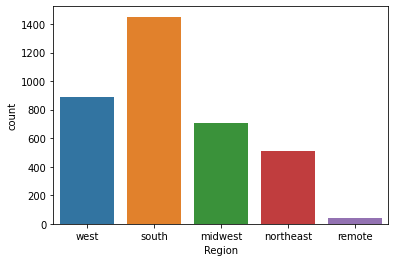

In [150]:
sns.countplot(removed_outliers['Region'])

In [151]:
removed_outliers.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/WithRegions.csv',index=False)

In [152]:
byRegion = pd.pivot_table(data=removed_outliers,index='Region',values='Average Salary')
byRegion.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
Region,
remote,96216.744186
west,90459.977452
northeast,84374.442270
south,83408.807719
midwest,78956.827195


In [153]:
byFull = pd.pivot_table(data=removed_outliers,index='Full-Time',values='Average Salary')
byFull.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
Full-Time,
yes,84537.310513
No,84494.557652


In [154]:
bySkill = pd.pivot_table(data=removed_outliers,index='Coding Skill',values='Average Salary')
bySkill.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
Coding Skill,
yes,87755.736160
No,83511.465798


In [155]:
byPHD = pd.pivot_table(data=removed_outliers,index='PHD',values='Average Salary')
byPHD.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
PHD,
yes,95443.354430
No,83460.770631


In [156]:
byMasters = pd.pivot_table(data=removed_outliers,index='Masters',values='Average Salary')
byMasters.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
Masters,
yes,90261.627907
No,83903.549572


In [157]:
byBsc = pd.pivot_table(data=removed_outliers,index='Bachelors',values='Average Salary')
byBsc.sort_values(by='Average Salary', ascending = False).head(10)

,Average Salary
Bachelors,
yes,86315.658588
No,77785.777778


In [158]:
removed_null = removed_outliers.dropna(axis=0,how='any',inplace=False)

In [159]:
removed_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 2 to 7716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            1549 non-null   object 
 1   Salary Estimate      1549 non-null   object 
 2   Job Description      1549 non-null   object 
 3   Company Name         1549 non-null   object 
 4   Location             1549 non-null   object 
 5   Size                 1549 non-null   object 
 6   Founded              1549 non-null   float64
 7   Type of ownership    1549 non-null   object 
 8   Industry             1549 non-null   object 
 9   Sector               1549 non-null   object 
 10  Revenue              1549 non-null   object 
 11  Average Salary       1549 non-null   float64
 12  States               1549 non-null   object 
 13  Company Age          1549 non-null   float64
 14  Bachelors            1549 non-null   object 
 15  Masters              1549 non-null   o

In [160]:
def coordinate_finder(col,coord):
    try:
        #time.sleep(0.5)
        loc = Nominatim(user_agent='GetLoc')
        getLoc = loc.geocode(col,timeout=10).raw
        return float(getLoc[coord])
    except GeocoderTimedOut as e:
        return col

In [161]:
coordinate_finder('Palo Alto CA','lon')

-122.1598465

In [162]:
removed_null['Latitude'] =  removed_null['Location'].apply(coordinate_finder,args=['lat'])
removed_null['Latitude'].head(10)

2     41.188130
7     33.572319
10    31.187132
11    44.832240
17    39.526121
28    33.197650
37    38.626426
40    38.753511
47    38.355439
48    35.084103
Name: Latitude, dtype: float64

In [163]:
removed_null['Longitude'] =  removed_null['Location'].apply(coordinate_finder,args=['lon'])
removed_null['Longitude'].head(10)

2    -103.699765
7     -81.618209
10    -94.781041
11    -93.320487
17   -119.812658
28    -96.615447
37    -90.199585
40    -91.145395
47    -87.567803
48   -106.650985
Name: Longitude, dtype: float64

In [164]:
removed_null['Revenue'].unique()

array(['$2 to $5 billion (USD)', '$10+ billion (USD)',
       '$1 to $2 billion (USD)', '$5 to $10 billion (USD)',
       '$500 million to $1 billion (USD)', '$100 to $500 million (USD)',
       '$1 to $5 million (USD)', '$25 to $50 million (USD)',
       '$10 to $25 million (USD)', '$5 to $10 million (USD)',
       '$50 to $100 million (USD)', 'Less than $1 million (USD)'],
      dtype=object)

In [165]:
def cleaned_revenue(col):
    try:
        if '$500 million to $1 billion' in col:
            revenue = re.findall(pattern='(\d{3}|\d{2}|\d{1}) billion',string=col)
            if len([float(i) for i in revenue]) == 0:
                pass
            else:
                return 1*(10**9)
        elif 'million' in col:
            revenue = re.findall(pattern='\d{3}|\d{2}|\d{1}',string=col)
            if len([float(i) for i in revenue]) == 0:
                print('no')
            else:
                return (sum([float(i) for i in revenue])/len([float(i) for i in revenue]))*10**6
        elif 'billion' in col:
            revenue = re.findall(pattern='\d{3}|\d{2}|\d{1}',string=col)
            if len([float(i) for i in revenue]) == 0:
                pass
            else:
                return (sum([float(i) for i in revenue])/len([float(i) for i in revenue]))*10**9
        else:
            return np.nan
    except TypeError:
        return np.nan
    


In [166]:
cleaned_revenue('$50 to $100 million (USD)')

75000000.0

In [167]:
removed_null['Average Revenue'] = removed_null['Revenue'].apply(cleaned_revenue)
removed_null['Average Revenue'].head(10)

2     3.500000e+09
7     3.500000e+09
10    3.500000e+09
11    1.000000e+10
17    1.500000e+09
28    1.000000e+10
37    1.000000e+10
40    1.000000e+10
47    1.000000e+10
48    1.000000e+10
Name: Average Revenue, dtype: float64

In [168]:
removed_null['Size'].unique()

array(['10000+ Employees', '1001 to 5000 Employees',
       '5001 to 10000 Employees', '501 to 1000 Employees',
       '201 to 500 Employees', '1 to 50 Employees', '51 to 200 Employees'],
      dtype=object)

In [169]:
def cleaned_employees(col):
    try:
        if 'Employees' in col:
            employee = re.findall(pattern='\d{5}|\d{4}|\d{3}|\d{2}|\d{1}',string=col)
            if len([float(i) for i in employee]) == 0:
                pass
            else:
                return (sum([float(i) for i in employee])//len([float(i) for i in employee]))
        else:
            return np.nan
    except TypeError:
        return np.nan

In [170]:
cleaned_employees('1001 to 5000 Employees')

3000.0

In [171]:
removed_null['Average Employee Size'] = removed_null['Size'].apply(cleaned_employees)
removed_null['Average Employee Size'].head(10)

2     10000.0
7     10000.0
10     3000.0
11    10000.0
17     3000.0
28    10000.0
37    10000.0
40    10000.0
47    10000.0
48    10000.0
Name: Average Employee Size, dtype: float64

In [172]:
removed_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 2 to 7716
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job Title              1549 non-null   object 
 1   Salary Estimate        1549 non-null   object 
 2   Job Description        1549 non-null   object 
 3   Company Name           1549 non-null   object 
 4   Location               1549 non-null   object 
 5   Size                   1549 non-null   object 
 6   Founded                1549 non-null   float64
 7   Type of ownership      1549 non-null   object 
 8   Industry               1549 non-null   object 
 9   Sector                 1549 non-null   object 
 10  Revenue                1549 non-null   object 
 11  Average Salary         1549 non-null   float64
 12  States                 1549 non-null   object 
 13  Company Age            1549 non-null   float64
 14  Bachelors              1549 non-null   object 
 15  Mast

In [173]:
removed_null.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/WithGeoCoordinates.csv', index=False)

In [175]:
def hourly_wage(col):
    if 'Hour' in col:
        return 'yes'
    else:
        return 'No'
removed_null['Hourly Wage'] = removed_null['Salary Estimate'].apply(hourly_wage)
removed_null['Hourly Wage'].value_counts()

No     1505
yes      44
Name: Hourly Wage, dtype: int64

In [178]:
def seniority(col):
    seniority = ['senior','snr','sr','sr.','lead','chief','principal']
    count = True
    while count == True:
        for item in seniority: 
            if item in col.lower():
                return 'yes'
        count = False
    return 'No'
removed_null['Senior'] = removed_null['Job Title'].apply(seniority)
removed_null['Senior'].value_counts()

No     1369
yes     180
Name: Senior, dtype: int64

In [181]:
def aspen(col):
    aspen = ['aspen','hysys','simulink','ansys','autocad','autodesk','cad','cae','auto-cad','chemcad','chemstation']
    count = True
    while count == True:
        for item in aspen: 
            if item in col.lower():
                return 'yes'
        count = False
    return 'No'
removed_null['Simulation Software'] = removed_null['Job Description'].apply(aspen)
removed_null['Simulation Software'].value_counts()

No     1192
yes     357
Name: Simulation Software, dtype: int64

In [182]:
removed_null.to_csv(r'/Users/user/Desktop/Project/Data/Cleaned Data/FinalDraft.csv',index=False)
removed_null.to_csv(r'/Users/user/Desktop/Project/Scripts/FinalDraft.csv',index=False)

<AxesSubplot:>

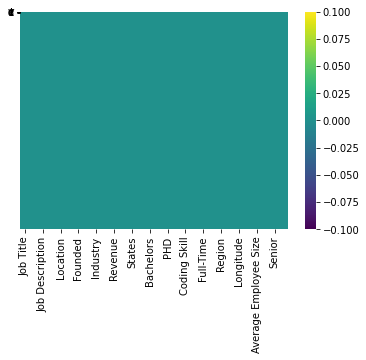

In [183]:
sns.heatmap(removed_null.isnull(),annot=False,cmap='viridis',yticklabels='vertical')